# Example Map Plotting - MOPITT CO

In [1]:
# By line: RRB 2020-07-26
# Script aims to:
# - Load a MOPITT HDF5 file
# - Extract variables: CO column, latitude, longitude
# - Create contour plot of variable as world map with coastlines
# - Customize contours and colorbar
# - Add axes labels
# - Add grid lines

### At the start of a Jupyter notebook you need to import all modules that you will use.

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                 # For plotting maps
import cartopy.feature as cfeature         # For plotting maps
from cartopy.util import add_cyclic_point  # For plotting maps
from pathlib import Path                   # System agnostic paths
import xarray as xr                        # For loading the data arrays
import numpy as np                         # For array creation and calculations
import h5py                                # For loading he5 files

### Define the directories and file of interest for your results.

In [3]:
result_dir = Path("../../data")
file = "MOP03JM-201801-L3V95.6.3.he5"
file_to_open = result_dir / file

### Load file

In [4]:
he5_load = h5py.File(file_to_open, mode='r')

### Extract dataset of choice

In [5]:
# load the data
dataset = he5_load["/HDFEOS/GRIDS/MOP03/Data Fields/RetrievedCOTotalColumnDay"][:]
lat = he5_load["/HDFEOS/GRIDS/MOP03/Data Fields/Latitude"][:]
lon = he5_load["/HDFEOS/GRIDS/MOP03/Data Fields/Longitude"][:]

# create xarray DataArray
dataset_new = xr.DataArray(dataset, dims=["lon","lat"], coords=[lon,lat])

# missing value -> nan
ds_masked = dataset_new.where(dataset_new != -9999.)

print(ds_masked)

<xarray.DataArray (lon: 360, lat: 180)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5


### Plot the value over the globe.

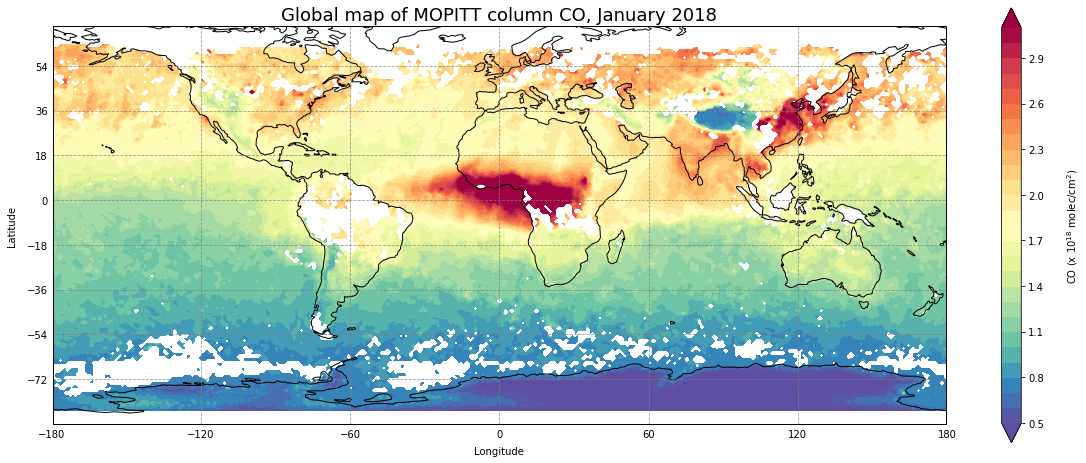

In [6]:
plt.figure(figsize=(20,8))

#Define projection
ax = plt.axes(projection=ccrs.PlateCarree())

#define contour levels
clev = np.arange(0.5, 3.2, 0.1)

#plot the data
plt.contourf(lon, lat, ds_masked.transpose()/1e18,clev,cmap='Spectral_r',extend='both')

# add coastlines
ax.add_feature(cfeature.COASTLINE)

#add lat lon grids
gl = ax.gridlines(draw_labels=True, color='grey', alpha=0.8, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# Titles
# Main
plt.title("Global map of MOPITT column CO, January 2018",fontsize=18)

# y-axis
ax.text(-0.04, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
# x-axis
ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
# legend
ax.text(1.15, 0.5, 'CO (x 10$^{18}$ molec/cm$^{2}$)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

plt.colorbar()
plt.show() 